In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import pdfplumber
import PyPDF2
import contextily as ctx

In [2]:
gdf = gpd.read_file('./data/metropolis_2020/shp/metropolis_2020.shp')

In [3]:
gdf.columns

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'CVE_MET', 'NOM_MET',
       'TIPO_MET', 'geometry'],
      dtype='object')

In [4]:
mexico_city = gdf.copy()
mexico_city = mexico_city[mexico_city["NOM_MET"] == "Ciudad de México"]

In [5]:
mexico_city

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,CVE_MET,NOM_MET,TIPO_MET,geometry
45,09002,09,002,Azcapotzalco,09.1.01,Ciudad de México,Zona metropolitana,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
46,09003,09,003,Coyoacán,09.1.01,Ciudad de México,Zona metropolitana,"POLYGON ((-99.13427 19.35654, -99.13397 19.356..."
47,09004,09,004,Cuajimalpa de Morelos,09.1.01,Ciudad de México,Zona metropolitana,"POLYGON ((-99.25738 19.40112, -99.25698 19.400..."
48,09005,09,005,Gustavo A. Madero,09.1.01,Ciudad de México,Zona metropolitana,"POLYGON ((-99.11124 19.5615, -99.11485 19.5576..."
49,09006,09,006,Iztacalco,09.1.01,Ciudad de México,Zona metropolitana,"POLYGON ((-99.05751 19.40673, -99.05753 19.406..."
...,...,...,...,...,...,...,...,...
165,15084,15,084,Temascalapa,09.1.01,Ciudad de México,Zona metropolitana,"POLYGON ((-98.84095 19.89231, -98.84153 19.890..."
167,15089,15,089,Tenango del Aire,09.1.01,Ciudad de México,Zona metropolitana,"POLYGON ((-98.87485 19.181, -98.8747 19.18002,..."
170,15099,15,099,Texcoco,09.1.01,Ciudad de México,Zona metropolitana,"POLYGON ((-98.82761 19.55491, -98.82761 19.554..."
171,15100,15,100,Tezoyuca,09.1.01,Ciudad de México,Zona metropolitana,"POLYGON ((-98.90429 19.60827, -98.90346 19.607..."


In [6]:
# CSV by hand, PDF modified by hand too.
with pdfplumber.open('./data/metropolis_2020/pdf/MM2020_06022024_modified.pdf') as pdf:
    first_page = pdf.pages[0]
    text = first_page.extract_text()
    #print(text)
with pdfplumber.open('./data/metropolis_2020/pdf/MM2020_06022024_modified.pdf') as pdf:
    first_page = pdf.pages[1]
    text = first_page.extract_text()
    #print(text)
with pdfplumber.open('./data/metropolis_2020/pdf/MM2020_06022024_modified.pdf') as pdf:
    first_page = pdf.pages[2]
    text = first_page.extract_text()
    #print(text)

In [7]:
mexico_city_data = pd.read_csv('./data/metropolis_2020/csv/cdmx.csv',
    dtype={'Clave': str})
mexico_city_data

,Clave,Municipio o demarcación territorial,1990,2000,2010,2020,1990-2000,2000-2010,2010-2020,Superficie (km2),DMU (hab/ha)
0,00000,Zona Metropolitana de la Ciudad de México,15337125.0,18096772.0,19769713,21436911,1.7,0.9,0.8,6070.3,161.3
1,09002,Azcapotzalco,474688.0,441008.0,414711,432205,-0.7,-0.6,0.4,33.5,189.8
2,09003,Coyoacán,640066.0,640423.0,620416,614447,0.0,-0.3,-0.1,53.9,192.5
3,09004,Cuajimalpa de Morelos,119669.0,151222.0,186391,217686,2.4,2.0,1.6,71.2,90.9
4,09005,Gustavo A. Madero,1268068.0,1235542.0,1185772,1173351,-0.3,-0.4,-0.1,87.9,195.1
...,...,...,...,...,...,...,...,...,...,...,...
59,15109,Tultitlán,246464.0,432141.0,486998,516341,5.8,1.2,0.6,66.0,155.5
60,15120,Zumpango,71413.0,99774.0,159647,280455,3.4,4.7,5.9,223.6,78.8
61,15121,Cuautitlán Izcalli,326750.0,453298.0,511675,555163,3.4,1.2,0.8,110.1,127.1
62,15122,Valle de Chalco Solidaridad,NaN,323461.0,357645,391731,NaN,1.0,0.9,46.7,163.9


In [8]:
mexico_city_data_filtered =mexico_city_data.copy()
mexico_city_data_filtered = mexico_city_data_filtered[mexico_city_data_filtered["Municipio o demarcación territorial"] != "Zona Metropolitana de la Ciudad de México"]

In [9]:
mexico_city_data["1990"][0]

np.float64(15337125.0)

In [10]:
mexico_city_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 1 to 63
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Clave                                63 non-null     object 
 1   Municipio o demarcación territorial  63 non-null     object 
 2   1990                                 61 non-null     float64
 3   2000                                 62 non-null     float64
 4   2010                                 63 non-null     int64  
 5   2020                                 63 non-null     int64  
 6   1990-2000                            61 non-null     float64
 7   2000-2010                            62 non-null     float64
 8   2010-2020                            63 non-null     float64
 9   Superficie (km2)                     63 non-null     float64
 10  DMU (hab/ha)                         63 non-null     float64
dtypes: float64(7), int64(2), object(2)
memo

In [11]:
#check that the sum of the filtered data matches the total
for i in mexico_city_data_filtered.columns[2:]:
    print(i, mexico_city_data_filtered[i].sum() ==mexico_city_data[i][0])

1990 True
2000 True
2010 True
2020 True
1990-2000 False
2000-2010 False
2010-2020 False
Superficie (km2) False
DMU (hab/ha) False


In [12]:
unified_data = mexico_city.merge(mexico_city_data_filtered,
    left_on="CVEGEO", right_on="Clave")
unified_data.columns

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'CVE_MET', 'NOM_MET',
       'TIPO_MET', 'geometry', 'Clave', 'Municipio o demarcación territorial',
       '1990', '2000', '2010', '2020', '1990-2000', '2000-2010', '2010-2020',
       'Superficie (km2)', 'DMU (hab/ha)'],
      dtype='object')

In [13]:
municipality_marco_geoestadictico_cdmx = gpd.read_file('./data/marco_geoestadistico/09_ciudaddemexico/conjunto_de_datos/09mun.shp')
municipality_marco_geoestadictico_edomex = gpd.read_file('./data/marco_geoestadistico/15_mexico/conjunto_de_datos/15mun.shp')
municipality_marco_geoestadictico_hidalgo = gpd.read_file('./data/marco_geoestadistico/13_hidalgo/conjunto_de_datos/13mun.shp')
metropolitan_municipalities = pd.concat([
    municipality_marco_geoestadictico_cdmx,
    municipality_marco_geoestadictico_edomex,
    municipality_marco_geoestadictico_hidalgo
])
metropolitan_municipalities = gpd.GeoDataFrame(metropolitan_municipalities, crs=municipality_marco_geoestadictico_cdmx.crs)

In [14]:
unified_data.columns

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'CVE_MET', 'NOM_MET',
       'TIPO_MET', 'geometry', 'Clave', 'Municipio o demarcación territorial',
       '1990', '2000', '2010', '2020', '1990-2000', '2000-2010', '2010-2020',
       'Superficie (km2)', 'DMU (hab/ha)'],
      dtype='object')

In [15]:
metropolitan_municipalities = metropolitan_municipalities[["CVEGEO", "geometry"]]

In [16]:
unified_data = unified_data.merge(metropolitan_municipalities[['CVEGEO', 'geometry']], on='CVEGEO')

In [17]:
unified_data.drop(columns=['geometry_x'], inplace=True)
unified_data.rename(columns={'geometry_y': 'geometry'}, inplace=True)
unified_data = gpd.GeoDataFrame(unified_data, geometry='geometry', crs=metropolitan_municipalities.crs)

In [18]:
mexico_city_data_filtered.shape[0]

63

In [19]:
mexico_city.shape[0]

63

In [20]:
unified_data.shape[0]

63

In [21]:
unified_data.rename(columns={
    "CVEGEO": "cvegeo",
    "CVE_ENT": "cve_ent",
    "CVE_MUN": "cve_mun",
    "NOMGEO": "nomgeo",
    "CVE_MET": "cve_met",
    "NOM_MET": "nom_met",
    "TIPO_MET": "tipo_met",
    '1990':'pop_1990',
    '2000':'pop_2000',
    '2010':'pop_2010',
    '2020':'pop_2020',
    '1990-2000':'change_1990_2000',
    '2000-2010':'change_2000_2010',
    '2010-2020':'change_2010_2020',
    'Superficie (km2)':'area_km2',
    'DMU (hab/ha)':'density_hab_ha',
}, inplace=True)

In [22]:
unified_data = unified_data[['cvegeo', 'cve_ent', 'cve_mun', 'nomgeo', 'cve_met', 'nom_met',
       'tipo_met', 'pop_1990', 'pop_2000', 'pop_2010', 'pop_2020', 'change_1990_2000', 'change_2000_2010', 'change_2010_2020',
       'area_km2', 'density_hab_ha', 'geometry']] 

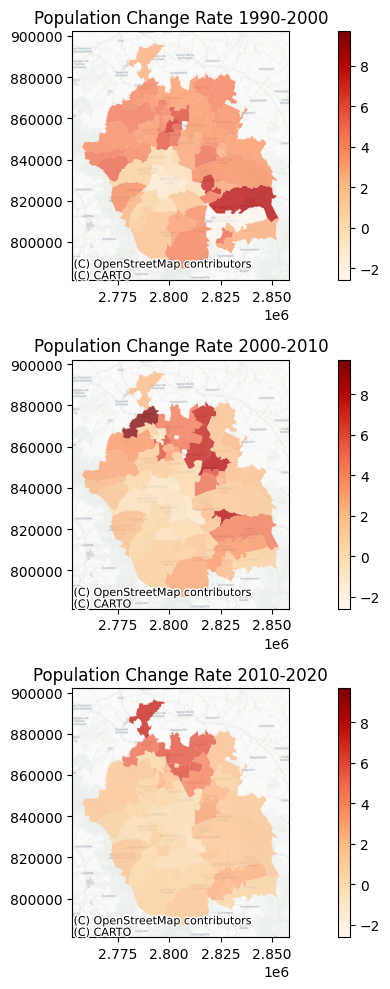

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

vmin = min(unified_data['change_1990_2000'].min(), 
           unified_data['change_2000_2010'].min(), 
           unified_data['change_2010_2020'].min())
vmax = max(unified_data['change_1990_2000'].max(), 
           unified_data['change_2000_2010'].max(), 
           unified_data['change_2010_2020'].max())

unified_data.plot(column='change_1990_2000', cmap='OrRd', legend=True, ax=ax[0], alpha=0.75, vmin=vmin, vmax=vmax)
unified_data.plot(column='change_2000_2010', cmap='OrRd', legend=True, ax=ax[1], alpha=0.75, vmin=vmin, vmax=vmax)
unified_data.plot(column='change_2010_2020', cmap='OrRd', legend=True, ax=ax[2], alpha=0.75, vmin=vmin, vmax=vmax)

ctx.add_basemap(ax[0], crs=unified_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1], crs=unified_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[2], crs=unified_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)

ax[0].set_title('Population Change Rate 1990-2000')
ax[1].set_title('Population Change Rate 2000-2010')
ax[2].set_title('Population Change Rate 2010-2020')
plt.tight_layout()

In [24]:
#change formula: ( ( ("Pf" / "Pi") ^ (1 / 10) ) - 1 ) * 100

def tcmate(initial_pop, final_pop, years):
    valid = (
        initial_pop.notna() &
        final_pop.notna() &
        (initial_pop != 0)
    )

    result = pd.Series(np.nan, index=initial_pop.index, dtype="float64")

    result[valid] = (
        ( (final_pop[valid] / initial_pop[valid]) ** (1 / years) - 1 ) * 100
    )

    return result

unified_data["verified_change_1990_2000"] = tcmate(unified_data["pop_1990"], unified_data["pop_2000"], 10)
unified_data["change_1990_2010"] = tcmate(unified_data["pop_1990"], unified_data["pop_2010"], 20).round(1)
unified_data["change_1990_2020"] = tcmate(unified_data["pop_1990"], unified_data["pop_2020"], 30).round(1)
unified_data["change_2000_2020"] = tcmate(unified_data["pop_2000"], unified_data["pop_2020"], 20).round(1)
unified_data["verified_change_1990_2000"] = unified_data["verified_change_1990_2000"].round(1)

In [25]:
unified_data = unified_data[[
    'cvegeo',
    'cve_ent',
    'cve_mun',
    'nomgeo',
    'cve_met',
    'nom_met',
    'tipo_met',
    'pop_1990',
    'pop_2000',
    'pop_2010',
    'pop_2020',
    'change_1990_2000', 
    'change_2000_2010', 
    'change_2010_2020',
    "change_1990_2010",
    "change_1990_2020",
    "change_2000_2020",   
    'area_km2',
    'density_hab_ha',
    'geometry'
    ]]

In [26]:
unified_data[["cvegeo", "nomgeo", "pop_1990", "pop_2000", "pop_2010", "pop_2020",
    "change_1990_2000", "change_2000_2010", "change_2010_2020",
    "change_1990_2010", "change_1990_2020", "change_2000_2020"]]

,cvegeo,nomgeo,pop_1990,pop_2000,pop_2010,pop_2020,change_1990_2000,change_2000_2010,change_2010_2020,change_1990_2010,change_1990_2020,change_2000_2020
0,09002,Azcapotzalco,474688.0,441008.0,414711,432205,-0.7,-0.6,0.4,-0.7,-0.3,-0.1
1,09003,Coyoacán,640066.0,640423.0,620416,614447,0.0,-0.3,-0.1,-0.2,-0.1,-0.2
2,09004,Cuajimalpa de Morelos,119669.0,151222.0,186391,217686,2.4,2.0,1.6,2.2,2.0,1.8
3,09005,Gustavo A. Madero,1268068.0,1235542.0,1185772,1173351,-0.3,-0.4,-0.1,-0.3,-0.3,-0.3
4,09006,Iztacalco,448322.0,411321.0,384326,404695,-0.9,-0.7,0.5,-0.8,-0.3,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
58,15084,Temascalapa,19099.0,29307.0,35987,43593,4.4,2.0,2.0,3.2,2.8,2.0
59,15089,Tenango del Aire,6207.0,8486.0,10578,11359,3.2,2.2,0.7,2.7,2.0,1.5
60,15099,Texcoco,140368.0,204102.0,235151,277562,3.8,1.4,1.7,2.6,2.3,1.5
61,15100,Tezoyuca,12416.0,18852.0,35199,47044,4.3,6.2,3.0,5.3,4.5,4.7


In [27]:
def clean_census_columns(df):

    skip_cols = [
    "ENTIDAD",
    "NOM_ENT",
    "MUN",
    "NOM_MUN",
    "LOC",
    "NOM_LOC",
    "AGEB",
    "MZA"
]
    
    for col in df.columns:
        if col not in skip_cols:
            # Replace "*" with NaN
            df[col] = df[col].replace("*", np.nan)

            # Convert to numeric
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [28]:
marco_geoestadistico_edomex_agebs = gpd.read_file("./data/marco_geoestadistico/15_mexico/conjunto_de_datos/15a.shp")
marco_geoestadistico_edomex_agebs_rurales = gpd.read_file("./data/marco_geoestadistico/15_mexico/conjunto_de_datos/15ar.shp")                                                  
edo_mex_agebs = pd.concat([marco_geoestadistico_edomex_agebs, marco_geoestadistico_edomex_agebs_rurales], ignore_index=True)
edo_mex_agebs = gpd.GeoDataFrame(edo_mex_agebs, geometry='geometry', crs=marco_geoestadistico_edomex_agebs.crs)
print("EdoMex before census merge:", edo_mex_agebs[edo_mex_agebs["geometry"].notnull()].shape)
censo_2020_edomex_agebs = pd.read_csv("./data/censos/2020/agebs_edomex.csv")
censo_2020_edomex_agebs = clean_census_columns(censo_2020_edomex_agebs)
censo_2020_edomex_agebs = censo_2020_edomex_agebs[~censo_2020_edomex_agebs["NOM_LOC"].isin(['Total de la entidad', 'Total del municipio', 'Total de la localidad urbana', 'Total AGEB urbana'])]
censo_2020_edomex_agebs["ENTIDAD"] = censo_2020_edomex_agebs["ENTIDAD"].apply(lambda x: str(x).zfill(2))
censo_2020_edomex_agebs["MUN"] = censo_2020_edomex_agebs["MUN"].apply(lambda x: str(x).zfill(3))
agg_dict = {col: "first" for col in censo_2020_edomex_agebs.columns if col != "AGEB"}
agg_dict["AGEB"] = "sum"

censo_2020_edomex_agebs = (
    censo_2020_edomex_agebs
        .groupby("AGEB", as_index=False)
        .agg(agg_dict)
).reset_index()
censo_2020_edomex_agebs.drop(columns=["index", "LOC", "MZA"], inplace=True)
edo_mex_agebs = edo_mex_agebs[["CVE_AGEB","geometry"]].merge(censo_2020_edomex_agebs,
    left_on="CVE_AGEB",
    right_on="AGEB",
    how="left")
print("EdoMex after census merge:", edo_mex_agebs[edo_mex_agebs["geometry"].notnull()].shape)

marco_geoestadistico_hidalgo_agebs = gpd.read_file("./data/marco_geoestadistico/13_hidalgo/conjunto_de_datos/13a.shp")
marco_geoestadistico_hidalgo_agebs_rurales = gpd.read_file("./data/marco_geoestadistico/13_hidalgo/conjunto_de_datos/13ar.shp")
hidalgo_agebs = pd.concat([marco_geoestadistico_hidalgo_agebs, marco_geoestadistico_hidalgo_agebs_rurales], ignore_index=True)                                                  
hidalgo_agebs = gpd.GeoDataFrame(hidalgo_agebs, geometry='geometry', crs=marco_geoestadistico_hidalgo_agebs.crs)
print("Hidalgo before census merge:", hidalgo_agebs[hidalgo_agebs["geometry"].notnull()].shape)
censo_2020_hidalgo_agebs = pd.read_csv("./data/censos/2020/agebs_hidalgo.csv")
censo_2020_hidalgo_agebs = clean_census_columns(censo_2020_hidalgo_agebs)
censo_2020_hidalgo_agebs = censo_2020_hidalgo_agebs[~censo_2020_hidalgo_agebs["NOM_LOC"].isin(['Total de la entidad', 'Total del municipio', 'Total de la localidad urbana', 'Total AGEB urbana'])]
censo_2020_hidalgo_agebs["ENTIDAD"] = censo_2020_hidalgo_agebs["ENTIDAD"].apply(lambda x: str(x).zfill(2))
censo_2020_hidalgo_agebs["MUN"] = censo_2020_hidalgo_agebs["MUN"].apply(lambda x: str(x).zfill(3))

agg_dict = {col: "first" for col in censo_2020_hidalgo_agebs.columns if col != "AGEB"}
agg_dict["AGEB"] = "sum"

censo_2020_hidalgo_agebs = (
    censo_2020_hidalgo_agebs
        .groupby("AGEB", as_index=False)
        .agg(agg_dict)
).reset_index()

censo_2020_hidalgo_agebs.drop(columns=[ "index", "LOC", "MZA"], inplace=True)

hidalgo_agebs = hidalgo_agebs[["CVE_AGEB","geometry"]].merge(censo_2020_hidalgo_agebs,
    left_on="CVE_AGEB",
    right_on="AGEB",
    how="left")
print("Hidalgo after census merge:", hidalgo_agebs[hidalgo_agebs["geometry"].notnull()].shape)

marco_geoestadistico_cdmx_agebs = gpd.read_file("./data/marco_geoestadistico/09_ciudaddemexico/conjunto_de_datos/09a.shp")
marco_geoestadistico_cdmx_agebs_rurales = gpd.read_file("./data/marco_geoestadistico/09_ciudaddemexico/conjunto_de_datos/09ar.shp")
cdmx_agebs = pd.concat([marco_geoestadistico_cdmx_agebs, marco_geoestadistico_cdmx_agebs_rurales], ignore_index=True)                                                  
cdmx_agebs = gpd.GeoDataFrame(cdmx_agebs, geometry='geometry', crs=marco_geoestadistico_cdmx_agebs.crs)
print("CDMX before census merge:", cdmx_agebs[cdmx_agebs["geometry"].notnull()].shape)
censo_2020_cdmx_agebs = pd.read_csv("./data/censos/2020/agebs_cdmx.csv")
censo_2020_cdmx_agebs = clean_census_columns(censo_2020_cdmx_agebs)
censo_2020_cdmx_agebs = censo_2020_cdmx_agebs[~censo_2020_cdmx_agebs["NOM_LOC"].isin(['Total de la entidad', 'Total del municipio', 'Total de la localidad urbana', 'Total AGEB urbana'])]
censo_2020_cdmx_agebs["ENTIDAD"] = censo_2020_cdmx_agebs["ENTIDAD"].apply(lambda x: str(x).zfill(2))
censo_2020_cdmx_agebs["MUN"] = censo_2020_cdmx_agebs["MUN"].apply(lambda x: str(x).zfill(3))

agg_dict = {col: "first" for col in censo_2020_cdmx_agebs.columns if col != "AGEB"}
agg_dict["AGEB"] = "sum"

censo_2020_cdmx_agebs = (
    censo_2020_cdmx_agebs
        .groupby("AGEB", as_index=False)
        .agg(agg_dict)
).reset_index()
censo_2020_cdmx_agebs.drop(columns=[ "index", "LOC", "MZA"], inplace=True)
cdmx_agebs = cdmx_agebs[["CVE_AGEB","geometry"]].merge(censo_2020_cdmx_agebs,
    left_on="CVE_AGEB",
    right_on="AGEB",
    how="left")
print("CDMX after census merge:", cdmx_agebs[cdmx_agebs["geometry"].notnull()].shape)

EdoMex before census merge: (4739, 6)
EdoMex after census merge: (4739, 230)
Hidalgo before census merge: (1703, 6)
Hidalgo after census merge: (1703, 230)
CDMX before census merge: (2453, 6)
CDMX after census merge: (2453, 230)


In [29]:
metropolitan_agebs = pd.concat([edo_mex_agebs, hidalgo_agebs, cdmx_agebs], ignore_index=True)
metropolitan_agebs = gpd.GeoDataFrame(metropolitan_agebs, geometry='geometry', crs=edo_mex_agebs.crs)

In [30]:
metropolitan_agebs["geometry"]

0       POLYGON ((2724760.362 886442.542, 2724772.989 ...
1       POLYGON ((2724704.501 885107.501, 2724699.213 ...
2       POLYGON ((2725014.737 886056.262, 2725029.237 ...
3       POLYGON ((2724581.913 884617.582, 2724516.498 ...
4       POLYGON ((2725794.811 885710.144, 2725786.999 ...
                              ...                        
8890    POLYGON ((2820850.327 806369.374, 2820699.591 ...
8891    POLYGON ((2817561.627 813207.344, 2817458.115 ...
8892    POLYGON ((2813145.635 812735.312, 2813192.873 ...
8893    POLYGON ((2813131.671 808007.225, 2813137.249 ...
8894    POLYGON ((2782616.034 822441.669, 2782657.696 ...
Name: geometry, Length: 8895, dtype: geometry

In [31]:
unified_data.to_crs("EPSG:32614", inplace=True)

In [32]:
metropolitan_agebs.to_crs("EPSG:32614", inplace=True)

In [33]:
#unified_data.to_crs(metropolitan_agebs.crs, inplace=True)

In [34]:
unified_data.columns

Index(['cvegeo', 'cve_ent', 'cve_mun', 'nomgeo', 'cve_met', 'nom_met',
       'tipo_met', 'pop_1990', 'pop_2000', 'pop_2010', 'pop_2020',
       'change_1990_2000', 'change_2000_2010', 'change_2010_2020',
       'change_1990_2010', 'change_1990_2020', 'change_2000_2020', 'area_km2',
       'density_hab_ha', 'geometry'],
      dtype='object')

In [35]:
#Modified HTML to add missing headers and make it more readable
historic_density_data = pd.read_html('./data/metropolis_2020/DMU_historic_data.html')
historic_density_data = historic_density_data[0]
## Only save municipalities to deal with nulls of name of state
historic_density_data = historic_density_data[364:][['Municipio', "2000", "2010"]]
#export it to CSV
historic_density_data.to_csv('./data/metropolis_2020/historic_density_data_cdmx.csv', index=True)

In [36]:
unified_data.columns

Index(['cvegeo', 'cve_ent', 'cve_mun', 'nomgeo', 'cve_met', 'nom_met',
       'tipo_met', 'pop_1990', 'pop_2000', 'pop_2010', 'pop_2020',
       'change_1990_2000', 'change_2000_2010', 'change_2010_2020',
       'change_1990_2010', 'change_1990_2020', 'change_2000_2020', 'area_km2',
       'density_hab_ha', 'geometry'],
      dtype='object')

In [37]:
unified_data["density_2020"] = unified_data["density_hab_ha"]
unified_data.drop(columns=['density_hab_ha'], inplace=True)
unified_data = unified_data.merge(historic_density_data,
    left_on="nomgeo",
    right_on="Municipio",
    how="left"
)
unified_data["density_2000"] = unified_data["2000"]
unified_data["density_2010"] = unified_data["2010"]
unified_data.drop(columns=['Municipio', "2000", "2010"], inplace=True)
unified_data = unified_data[['cvegeo', 'cve_ent', 'cve_mun', 'nomgeo',
       'tipo_met', 'pop_1990', 'pop_2000', 'pop_2010', 'pop_2020',
       'change_1990_2000', 'change_2000_2010', 'change_2010_2020',
       'change_1990_2010', 'change_1990_2020', 'change_2000_2020', 
       'density_2000', 'density_2010', 'density_2020',
       'geometry']]



In [38]:
#cut metropolitan_agebs using unified_data boundaries
metropolitan_agebs = gpd.overlay(metropolitan_agebs, unified_data[['geometry']], how='intersection')

/Users/juandiaz/urba_data_story/.venv/lib/python3.12/site-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 5349 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


In [39]:
unified_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cvegeo            63 non-null     object  
 1   cve_ent           63 non-null     object  
 2   cve_mun           63 non-null     object  
 3   nomgeo            63 non-null     object  
 4   tipo_met          63 non-null     object  
 5   pop_1990          61 non-null     float64 
 6   pop_2000          62 non-null     float64 
 7   pop_2010          63 non-null     int64   
 8   pop_2020          63 non-null     int64   
 9   change_1990_2000  61 non-null     float64 
 10  change_2000_2010  62 non-null     float64 
 11  change_2010_2020  63 non-null     float64 
 12  change_1990_2010  61 non-null     float64 
 13  change_1990_2020  61 non-null     float64 
 14  change_2000_2020  62 non-null     float64 
 15  density_2000      62 non-null     object  
 16  density_2010      62

In [40]:
unified_data = gpd.GeoDataFrame(unified_data, geometry='geometry', crs=edo_mex_agebs.crs)

unified_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cvegeo            63 non-null     object  
 1   cve_ent           63 non-null     object  
 2   cve_mun           63 non-null     object  
 3   nomgeo            63 non-null     object  
 4   tipo_met          63 non-null     object  
 5   pop_1990          61 non-null     float64 
 6   pop_2000          62 non-null     float64 
 7   pop_2010          63 non-null     int64   
 8   pop_2020          63 non-null     int64   
 9   change_1990_2000  61 non-null     float64 
 10  change_2000_2010  62 non-null     float64 
 11  change_2010_2020  63 non-null     float64 
 12  change_1990_2010  61 non-null     float64 
 13  change_1990_2020  61 non-null     float64 
 14  change_2000_2020  62 non-null     float64 
 15  density_2000      62 non-null     object  
 16  density_2010      62

In [41]:
unified_data["density_2000"] = unified_data["density_2000"].replace("-", np.nan)
unified_data["density_2000"] = pd.to_numeric(unified_data["density_2000"], errors='coerce')
unified_data["density_2010"] = unified_data["density_2010"].replace("-", np.nan)
unified_data["density_2010"] = pd.to_numeric(unified_data["density_2010"], errors='coerce')


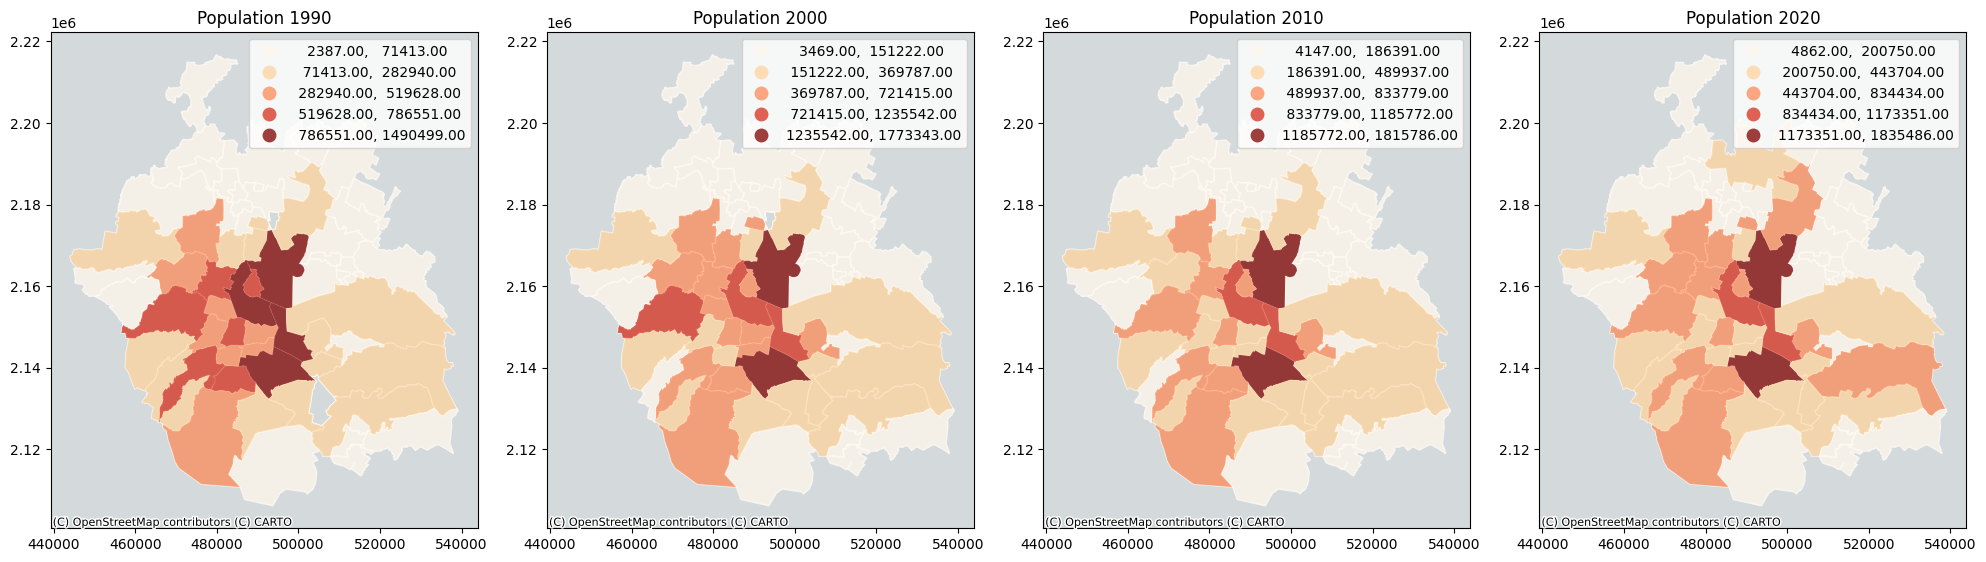

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')

unified_data.plot(ax=ax[0], alpha=0.75, edgecolor='white', color='none')
unified_data.plot(column='pop_1990', cmap='OrRd', legend=True, ax=ax[0], alpha=0.75, scheme="naturalbreaks")
ctx.add_basemap(ax[0], crs=unified_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax[0].set_aspect('equal')
ax[0].set_title('Population 1990')


unified_data.plot(ax=ax[1], alpha=0.75, edgecolor='white', color='none')
unified_data.plot(column='pop_2000', cmap='OrRd', legend=True, ax=ax[1], alpha=0.75, scheme="naturalbreaks")
ctx.add_basemap(ax[1], crs=unified_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax[1].set_aspect('equal')
ax[1].set_title('Population 2000')


unified_data.plot(ax=ax[2], alpha=0.75, edgecolor='white', color='none')
unified_data.plot(column='pop_2010', cmap='OrRd', legend=True, ax=ax[2], alpha=0.75, scheme="naturalbreaks")
ctx.add_basemap(ax[2], crs=unified_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax[2].set_aspect('equal')
ax[2].set_title('Population 2010')


unified_data.plot(ax=ax[3], alpha=0.75, edgecolor='white', color='none')
unified_data.plot(column='pop_2020', cmap='OrRd', legend=True, ax=ax[3], alpha=0.75, scheme="naturalbreaks")
ctx.add_basemap(ax[3], crs=unified_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax[3].set_aspect('equal')
ax[3].set_title('Population 2020')


plt.tight_layout()

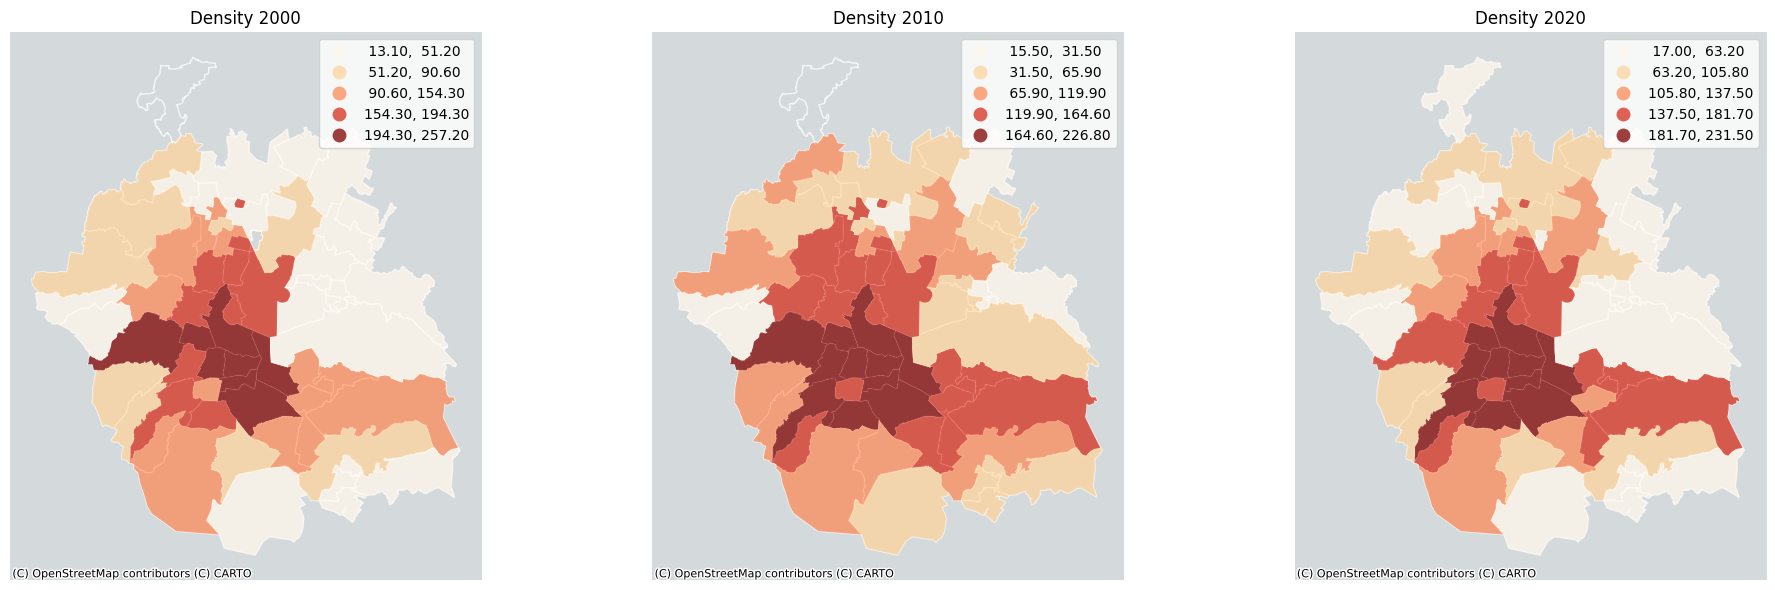

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

unified_data.plot(ax=ax[0], alpha=0.75, edgecolor='white', color='none')
unified_data.plot(column='density_2000', cmap='OrRd', legend=True, ax=ax[0], alpha=0.75, scheme="naturalbreaks")
ctx.add_basemap(ax[0], crs=unified_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax[0].set_aspect('equal')
ax[0].set_title('Density 2000')


unified_data.plot(ax=ax[1], alpha=0.75, edgecolor='white', color='none')
unified_data.plot(column='density_2010', cmap='OrRd', legend=True, ax=ax[1], alpha=0.75, scheme="naturalbreaks")
ctx.add_basemap(ax[1], crs=unified_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax[1].set_aspect('equal')
ax[1].set_title('Density 2010')


unified_data.plot(ax=ax[2], alpha=0.75, edgecolor='white', color='none')
unified_data.plot(column='density_2020', cmap='OrRd', legend=True, ax=ax[2], alpha=0.75, scheme="naturalbreaks")
ctx.add_basemap(ax[2], crs=unified_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax[2].set_aspect('equal')
ax[2].set_title('Density 2020')

plt.tight_layout()